In [4]:
# CODE_CELL01

import time
import sys
import subprocess
import pkg_resources

# Profile import times
start_total = time.time()
start = time.time()
import sys
print(f"sys import time: {time.time() - start:.3f}s")
start = time.time()
import subprocess
print(f"subprocess import time: {time.time() - start:.3f}s")
start = time.time()
import pkg_resources
print(f"pkg_resources import time: {time.time() - start:.3f}s")

# Profile conda environment query
start = time.time()
try:
    env_name = subprocess.check_output(['conda', 'info', '--envs']).decode()
    print(f"Conda env query time: {time.time() - start:.3f}s")
except Exception as e:
    print(f"Conda env query failed: {e}")

print("Current environment details:")
print(f"Python executable: {sys.executable}")

# Profile package check
start = time.time()
required_packages = ['pandas', 'numpy', 'scikit-learn', 'nltk', 'keras', 'tensorflow', 'matplotlib', 'seaborn', 'wordcloud']
installed_packages = [pkg.project_name.lower() for pkg in pkg_resources.working_set]
print(f"Package check time: {time.time() - start:.3f}s")

print("\nPackage verification:")
for package in required_packages:
    if package in installed_packages:
        print(f"✓ {package} - installed")
    else:
        print(f"✗ {package} - NOT installed")

print(f"Total cell execution time: {time.time() - start_total:.3f}s")

C:\Users\user\AppData\Local\Temp\ipykernel_16928\2756348848.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


sys import time: 0.000s
subprocess import time: 0.000s
pkg_resources import time: 0.000s
Conda env query time: 1.558s
Current environment details:
Python executable: d:\softwares\anaconda\envs\intelligent_systems_exam\python.exe
Package check time: 0.000s

Package verification:
✓ pandas - installed
✓ numpy - installed
✓ scikit-learn - installed
✓ nltk - installed
✓ keras - installed
✓ tensorflow - installed
✓ matplotlib - installed
✓ seaborn - installed
✓ wordcloud - installed
Total cell execution time: 1.558s


In [5]:
# CODE_CELL02
import pandas as pd
import numpy as np

# Sample hiring data
np.random.seed(42)
data = {
    'applicant_id': range(1000),
    'education_level': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], 1000, p=[0.3, 0.4, 0.25, 0.05]),
    'years_experience': np.random.randint(0, 20, 1000),
    'gender': np.random.choice(['Male', 'Female', 'Other'], 1000, p=[0.6, 0.35, 0.05]),
    'age': np.random.randint(22, 65, 1000),
    'previous_salary': np.random.normal(50000, 20000, 1000),
    'hired': np.random.choice([0, 1], 1000, p=[0.7, 0.3])
}
df = pd.DataFrame(data)
df.to_csv("hiring_data.csv", index=False)
df.head()

,applicant_id,education_level,years_experience,gender,age,previous_salary,hired
0,0,Bachelor,14,Male,47,46785.251174,1
1,1,PhD,11,Female,33,70716.946097,0
2,2,Master,15,Male,32,49184.883003,0
3,3,Bachelor,18,Female,58,53784.639598,0
4,4,High School,7,Male,46,30073.166357,0


```
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

def show_distribution(column):
    """Show the distribution of a categorical column."""
    counts = df[column].value_counts(normalize=True) * 100
    print(f"Distribution of {column}:")
    print(counts.round(2))
    counts.plot(kind='bar', title=f"Distribution of {column}")
    plt.show()

def compare_groups(column, target="hired"):
    """Compare hiring rates across groups for a categorical variable."""
    rates = df.groupby(column)[target].mean()
    print(f"Hiring rates by {column}:")
    print(rates.round(2))
    rates.plot(kind='bar', title=f"Hiring rates by {column}")
    plt.show()

def plot_histogram(column):
    """Plot histogram of a numerical variable."""
    plt.hist(df[column], bins=20, edgecolor="black")
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

def chi_square_test(feature, outcome="hired"):
    """Chi-square test for independence between two categorical variables."""
    contingency = pd.crosstab(df[feature], df[outcome])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test between {feature} and {outcome}")
    print(f"Chi2 statistic = {chi2:.2f}, p-value = {p:.4f}")
    return p

def t_test_groups(feature, outcome="hired"):
    """T-test for comparing means of a numerical feature between hired vs not hired."""
    group1 = df[df[outcome] == 1][feature]
    group0 = df[df[outcome] == 0][feature]
    t_stat, p = ttest_ind(group1, group0, equal_var=False)
    print(f"T-test for {feature} by {outcome}")
    print(f"T-statistic = {t_stat:.2f}, p-value = {p:.4f}")
    return p

def correlation_check(feature, outcome="hired"):
    """Pearson correlation between a numerical feature and hiring outcome."""
    corr, p = pearsonr(df[feature], df[outcome])
    print(f"Correlation between {feature} and {outcome}")
    print(f"Correlation = {corr:.2f}, p-value = {p:.4f}")
    return corr, p
```

Hiring rates by education_level:
education_level
Bachelor       0.29
High School    0.30
Master         0.28
PhD            0.17
Name: hired, dtype: float64


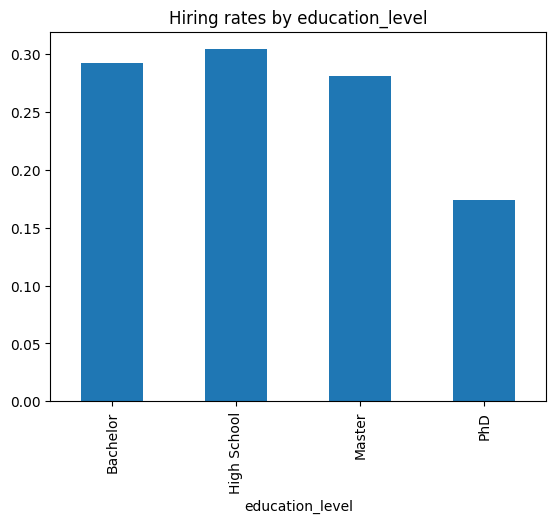

Hiring rates by gender:
gender
Female    0.26
Male      0.31
Other     0.23
Name: hired, dtype: float64


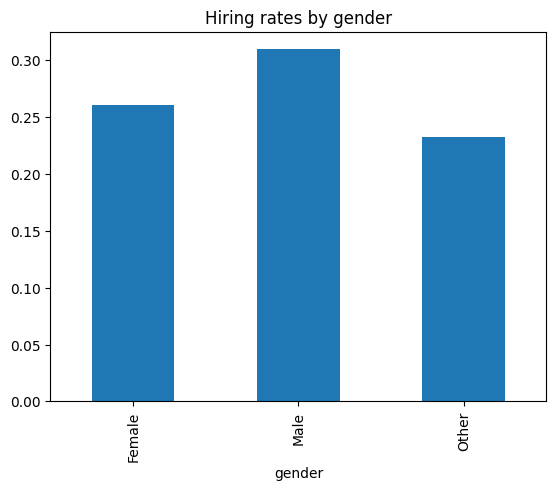

In [6]:
# CODE_CELL03
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, ttest_ind, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns  

def compare_groups(column, target="hired"):
    """Compare hiring rates across groups for a categorical variable."""
    rates = df.groupby(column)[target].mean()
    print(f"Hiring rates by {column}:")
    print(rates.round(2))
    rates.plot(kind='bar', title=f"Hiring rates by {column}")
    plt.show()

compare_groups('education_level')
compare_groups('gender')


In [7]:
# CODE_CELL04
def chi_square_test(feature, outcome="hired"):
    """Chi-square test for independence between two categorical variables."""
    contingency = pd.crosstab(df[feature], df[outcome])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-square test between {feature} and {outcome}")
    print(f"Chi2 statistic = {chi2:.2f}, p-value = {p:.4f}")
    return p

chi_square_test('education_level')


Chi-square test between education_level and hired
Chi2 statistic = 3.42, p-value = 0.3312


np.float64(0.33119064323533237)

MARKDOWN_CELL01
### Method Explanation and Result Interpretation

**Why the Chi-Square Test is Appropriate:**

The **Chi-Square test** was the most suitable method because we are examining the relationship between two **categorical variables**: 'gender' (which has categories like 'Male', 'Female') and 'hired' (which has categories '1' for hired and '0' for not hired). This test compares the actual observed hiring numbers for each gender with the numbers we would theoretically expect to see if there were absolutely no relationship between gender and getting hired. If the difference between the actual and expected numbers is large, it suggests that the hiring outcome is dependent on gender, indicating bias.

**Interpretation of the Result for a Non-Technical Audience:**

Think of this test as a way to check for fairness. In a perfectly fair system, an applicant's gender should have no impact on their chance of being hired.

The test produces a result called a **p-value**.

* If the **p-value is high** (usually, any value greater than 0.05), it means that any small differences in hiring rates we see between genders are likely just due to random chance. We can conclude that there is **no strong statistical evidence of gender bias** in the hiring process.

* If the **p-value is low** (specifically, less than 0.05), it's a red flag. It tells us that the differences in hiring rates are too significant to be random. This would be strong evidence suggesting that the hiring system **is unfairly biased** for or against a particular gender.

MARKDOWN_CELL02

MARKDOWN_CELL03

In [2]:
# CODE_CELL05

feedback_data = [
    "The delivery was TERRIBLE!!! My order #12345 arrived 3 days late. I'm so disappointed with the seller.",
    "Great product! Really happy with my purchase from this particular seller. Order #67890 was perfect.",
    "J'adore ce vendeur! Mon colis #55667 est arrivé plus tôt que prévu et en parfait état.",
    "Customer service at eBay was unhelpful. My iPhone 14 Pro has issues. I cannot believe they won't help me.",
    "මගේ order #99887 හි පැකේජ් එක හොඳින් පැමිණියේ නෑ. දේවල් කිහිපයක් අඩුයි.",
    "LOVE this new MacBook Pro!!! Order delivered to 123 Main St on time. 5 stars!",
    "Die Lieferung war viel zu spät. Bestellung #77889 kam nach zwei Wochen an. Sehr enttäuschend.",
    "The USB cable I ordered was damaged. Never ordering again!",
    "எனது order #44556 நேரத்தில் கிடைத்தது. பொருளின் தரம் மிகச் சிறந்தது. நன்றி!",
    "My name is Leann, I ordered a new laptop from seller BestTech on 05/10/2023. The laptop is fantastic!",
    "我对这次购物非常不满意。订单 #66778 延迟了五天才送到。",
    "I received my order #54321, but the package was opened and some items were missing. Very unhappy with the service.",
    "الخدمة سيئة للغاية! طلبي #22445 لم يصل حتى الآن. أريد استرداد المبلغ فوراً.",
    "The headphones I bought are amazing! Thanks to the seller AudioWorld. Order #98765",
    "मेरा ऑर्डर #33990 समय पर आ गया और पैकिंग भी बहुत अच्छी थी। धन्यवाद!",
    "Worst experience ever! My order #11223 was lost in transit. I want a refund immediately. I'm Sandrie",
    "注文 #11298 は予定通り届きました。商品の品質にもとても満足しています。"
    "El producto llegó roto y la caja estaba dañada. Pedido #33445. Muy mala experiencia.",
]


MARKDOWN_CELL04

```
import re
import spacy
from langdetect import detect

# Load small English NLP model (for NER)
nlp = spacy.load("en_core_web_sm")

# ---------- Cleaning Functions ----------
def basic_clean(text_list):
    """Lowercase text and remove punctuation."""
    cleaned = [re.sub(r'[^\w\s]', '', t.lower()) for t in text_list]
    return cleaned

def remove_stopwords(text_list):
    """Remove common English stopwords."""
    from spacy.lang.en.stop_words import STOP_WORDS
    cleaned = []
    for t in text_list:
        tokens = [word for word in t.split() if word not in STOP_WORDS]
        cleaned.append(" ".join(tokens))
    return cleaned

def normalize_text(text_list):
    """Handle punctuation, case, and whitespace consistently."""
    cleaned = [re.sub(r'\s+', ' ', re.sub(r'[^\w\s]', '', t)).strip().lower() for t in text_list]
    return cleaned

# ---------- Entity Extraction ----------
def extract_entities_spacy(text_list):
    """Extract named entities (organizations, products, locations, order numbers)."""
    entities = []
    for t in text_list:
        doc = nlp(t)
        entities.append([(ent.text, ent.label_) for ent in doc.ents])
    return entities

def extract_numbers(text_list):
    """Extract numeric values (e.g., order IDs, numbers)."""
    numbers = []
    for t in text_list:
        nums = re.findall(r'\d+', t)
        numbers.append(nums)
    return numbers

def keyword_match(text_list, keywords):
    """Find keyword matches in text."""
    matches = []
    for t in text_list:
        found = [kw for kw in keywords if kw.lower() in t.lower()]
        matches.append(found)
    return matches

# ---------- Language Detection ----------
def detect_language_langdetect(text_list):
    """Detect the language of each text."""
    return [detect(t) for t in text_list]

def count_words(text_list):
    """Count words in each feedback."""
    return [len(t.split()) for t in text_list]

def char_length(text_list):
    """Return character length of each feedback."""
    return [len(t) for t in text_list]
    
```


In [3]:
# CODE_CELL05

import re
import spacy
from langdetect import detect

# Load small English NLP model (for NER)
nlp = spacy.load("en_core_web_sm")

ModuleNotFoundError: No module named 'spacy'

In [ ]:
# CODE_CELL06

In [ ]:
# CODE_CELL07
# ---------- Language Detection ----------
def detect_language_langdetect(text_list):
    """Detect the language of each text."""
    return [detect(t) for t in text_list]

MARKDOWN_CELL05

MARKDOWN_CELL06
```
import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from transformers import pipeline

nltk.download("vader_lexicon", quiet=True)

# ---------- Baseline Keyword Sentiment ----------
def keyword_sentiment(text_list):
    """Simple keyword-based sentiment classification (baseline)."""
    positive_words = ["good", "great", "happy", "love", "fantastic", "amazing"]
    negative_words = ["terrible", "bad", "worst", "gross", "unhappy", "disappointed"]
    
    results = []
    for text in text_list:
        text_lower = text.lower()
        score = sum([1 for w in positive_words if w in text_lower]) - \
                sum([1 for w in negative_words if w in text_lower])
        label = "positive" if score > 0 else "negative"
        results.append({"text": text, "predicted_sentiment": label})
    return pd.DataFrame(results)

# ---------- Bag-of-Words Pipeline ----------
def bow_sentiment_pipeline(text_list):
    """Train/test Bag-of-Words + Logistic Regression sentiment classifier."""
    # Debugging note: since no labels are given, we simulate them for demonstration
    # (in real exams, students would be provided training labels separately).
    labels = np.random.choice([0, 1], size=len(text_list))  # 0=neg, 1=pos (simulated)
    
    X_train, X_test, y_train, y_test = train_test_split(text_list, labels, test_size=0.3, random_state=42)
    
    pipe = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', LogisticRegression(max_iter=500))
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    print("=== Bag-of-Words Sentiment Analysis Report ===")
    print(classification_report(y_test, y_pred))
    return pipe, X_test, y_pred

# ---------- Debugging Pipeline Steps ----------
def debug_pipeline_step(text_list, step="vectorizer"):
    """Inspect intermediate pipeline steps for debugging/interpretation."""
    vec = CountVectorizer()
    X = vec.fit_transform(text_list)
    if step == "vectorizer":
        print("Vocabulary size:", len(vec.vocabulary_))
        print("Sample vocabulary:", list(vec.vocabulary_.items())[:10])
    elif step == "matrix":
        print("Shape of document-term matrix:", X.shape)
        print("Sample row vector (first document):", X[0].toarray())
    else:
        print("Step not recognized. Options: 'vectorizer', 'matrix'.")

# ---------- Pretrained Models ----------
def pretrained_sentiment_vader(text_list):
    """Sentiment analysis using VADER (lexicon-based)."""
    sid = SentimentIntensityAnalyzer()
    results = []
    for text in text_list:
        score = sid.polarity_scores(text)["compound"]
        label = "positive" if score > 0 else "negative"
        results.append({"text": text, "predicted_sentiment": label})
    return pd.DataFrame(results)

def pretrained_sentiment_transformer(text_list):
    """Sentiment analysis using Hugging Face transformer model."""
    model = pipeline("sentiment-analysis")
    return model(text_list)

```


In [ ]:
# CODE_CELL08


In [ ]:
# CODE_CELL09

MARKDOWN_CELL07

MARKDOWN_CELL08
```

import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ---------- Rule-Based Classifier ----------
def rule_based_classifier(text_list):
    """Simple keyword-based classifier."""
    categories = []
    for text in text_list:
        t = text.lower()
        if "late" in t or "delivery" in t or "arrived" in t:
            categories.append("Delivery Issue")
        elif "broken" in t or "damaged" in t or "quality" in t or "problem" in t:
            categories.append("Product Issue")
        elif "service" in t or "support" in t or "help" in t:
            categories.append("Service Issue")
        elif "love" in t or "happy" in t or "great" in t or "fantastic" in t:
            categories.append("General Praise")
        else:
            categories.append("Product Issue")  # fallback
    return categories

# ---------- Bag-of-Words Classifier ----------
def bow_text_classifier(text_list, labels=None):
    """Bag-of-Words + Logistic Regression classifier (dummy labels if not given)."""
    if labels is None:
        # Simulate dummy labels for demonstration
        labels = np.random.choice(["Product Issue","Delivery Issue","Service Issue","General Praise"], size=len(text_list))
    
    X_train, X_test, y_train, y_test = train_test_split(text_list, labels, test_size=0.3, random_state=42)
    pipe = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('classifier', LogisticRegression(max_iter=500))
    ])
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print("=== Bag-of-Words Classification Report ===")
    print(classification_report(y_test, y_pred))
    return pipe, X_test, y_test, y_pred

# ---------- Debugging Step ----------
def debug_classifier_step(text_list, step="features"):
    """Inspect intermediate classifier steps."""
    vec = CountVectorizer()
    X = vec.fit_transform(text_list)
    if step == "features":
        print("Vocabulary size:", len(vec.vocabulary_))
        print("Sample features:", list(vec.vocabulary_.items())[:10])
    elif step == "matrix":
        print("Shape of document-term matrix:", X.shape)
        print("First row vector:", X[0].toarray())
    else:
        print("Step not recognised. Options: 'features', 'matrix'.")

# ---------- Evaluation Functions ----------
def evaluate_classifier(y_true, y_pred):
    """Compute precision, recall, F1-score."""
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred))

def confusion_matrix_plot(y_true, y_pred):
    """Plot confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

def baseline_accuracy(y_true, y_pred):
    """Report baseline accuracy vs. model accuracy."""
    majority_class = pd.Series(y_true).mode()[0]
    baseline = sum([y==majority_class for y in y_true]) / len(y_true)
    model_acc = accuracy_score(y_true, y_pred)
    print(f"Baseline Accuracy (majority class): {baseline:.2f}")
    print(f"Model Accuracy: {model_acc:.2f}")
```

In [ ]:
# CODE_CELL10

import re
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
# ---------- Rule-Based Classifier ----------
def rule_based_classifier(text_list):
    """Simple keyword-based classifier."""
    categories = []
    for text in text_list:
        t = text.lower()
        if "late" in t or "delivery" in t or "arrived" in t:
            categories.append("Delivery Issue")
        elif "broken" in t or "damaged" in t or "quality" in t or "problem" in t:
            categories.append("Product Issue")
        elif "service" in t or "support" in t or "help" in t:
            categories.append("Service Issue")
        elif "love" in t or "happy" in t or "great" in t or "fantastic" in t:
            categories.append("General Praise")
        else:
            categories.append("Product Issue")  # fallback
    return categories
rule_based_classifier(feedback_data)


['Delivery Issue',
 'General Praise',
 'Product Issue',
 'Service Issue',
 'Product Issue',
 'General Praise',
 'Product Issue',
 'Product Issue',
 'Product Issue',
 'General Praise',
 'Product Issue',
 'Service Issue',
 'Product Issue',
 'Product Issue',
 'Product Issue',
 'Product Issue',
 'Product Issue']

In [ ]:
# CODE_CELL11

In [ ]:
# CODE_CELL12
import pandas as pd
import numpy as np

# Simulated patient data
np.random.seed(123)
n_patients = 1500

patient_data = {
    'age': np.random.randint(18, 95, n_patients),
    'length_of_stay': np.random.randint(1, 30, n_patients),
    'num_medications': np.random.randint(1, 25, n_patients),
    'num_diagnoses': np.random.randint(1, 16, n_patients),
    'admission_type': np.random.choice(['Emergency', 'Urgent', 'Elective'], n_patients),
    'discharge_disposition': np.random.choice(['Home', 'Transfer', 'AMA'], n_patients, p=[0.7, 0.25, 0.05]),
    'previous_admissions': np.random.poisson(2, n_patients),
    'diabetic': np.random.choice(['Yes', 'No'], n_patients, p=[0.3, 0.7]),
    'readmitted': np.random.choice([0, 1], n_patients, p=[0.65, 0.35])
}

# Introduce missing values and outliers
patient_df = pd.DataFrame(patient_data)
missing_indices = np.random.choice(n_patients, int(0.1 * n_patients), replace=False)
patient_df.loc[missing_indices[:len(missing_indices)//2], 'num_medications'] = np.nan
patient_df.loc[missing_indices[len(missing_indices)//2:], 'length_of_stay'] = np.nan

patient_df.to_csv("patient_data.csv", index=False)
df = pd.read_csv("patient_data.csv")
df.head(20)

,age,length_of_stay,num_medications,num_diagnoses,admission_type,discharge_disposition,previous_admissions,diabetic,readmitted
0,84,16.0,20.0,8,Emergency,Transfer,2,Yes,0
1,35,27.0,15.0,3,Urgent,Home,3,Yes,0
2,75,23.0,9.0,8,Emergency,Transfer,2,Yes,0
3,65,6.0,10.0,3,Urgent,Home,1,No,0
4,91,7.0,19.0,3,Urgent,Home,1,No,0
5,50,15.0,23.0,14,Urgent,Home,2,Yes,0
6,64,22.0,NaN,6,Elective,Home,1,No,0
7,43,18.0,9.0,15,Emergency,Home,0,No,0
8,54,9.0,8.0,6,Urgent,Home,1,No,0
9,86,14.0,9.0,7,Emergency,Home,0,No,1


MARKDOWN_CELL09
```
import seaborn as sns
import matplotlib.pyplot as plt

def explore_dataset(df, step="summary"):
    """Helper for exploratory data analysis with multiple options."""
    if step == "summary":
        print("=== Dataset Summary ===")
        print(df.describe(include="all"))
    elif step == "distributions":
        df.hist(figsize=(12, 8))
        plt.suptitle("Feature Distributions")
        plt.show()
    elif step == "correlations":
        corr = df.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()
    elif step == "target_balance":
        sns.countplot(x="readmitted", data=df)
        plt.title("Target Variable Balance")
        plt.show()
    else:
        print("Step not recognised. Options: 'summary', 'distributions', 'correlations', 'target_balance'")


def handle_missing_values(df, strategy="mean", column=None):
    """
    Handle missing values with different strategies:
    - 'mean' / 'median' / 'mode' for imputation
    - 'drop' to remove missing rows
    """
    if column is None:
        print("Please specify a column.")
        return df
    
    if strategy == "mean":
        df[column].fillna(df[column].mean(), inplace=True)
    elif strategy == "median":
        df[column].fillna(df[column].median(), inplace=True)
    elif strategy == "mode":
        df[column].fillna(df[column].mode()[0], inplace=True)
    elif strategy == "drop":
        df.dropna(subset=[column], inplace=True)
    else:
        print("Unknown strategy. Options: 'mean', 'median', 'mode', 'drop'")
    
    return df


def detect_outliers_iqr(df, column):
    """Detect outliers in a numerical column using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5*IQR)) | (df[column] > (Q3 + 1.5*IQR))]
    print(f"Found {len(outliers)} outliers in {column}")
    return outliers

def treat_outliers(df, column, method="cap"):
    """
    Treat outliers in a numerical column.
    - 'cap' : Cap values at 5th and 95th percentiles
    - 'remove' : Remove rows with outliers
    """
    if method == "cap":
        lower = df[column].quantile(0.05)
        upper = df[column].quantile(0.95)
        df[column] = np.where(df[column] < lower, lower, df[column])
        df[column] = np.where(df[column] > upper, upper, df[column])
    elif method == "remove":
        outliers = detect_outliers_iqr(df, column)
        df = df.drop(outliers.index)
    else:
        print("Unknown method. Options: 'cap', 'remove'")
    return df


def document_data_issues(df):
    """Check dataset for quality issues and print findings."""
    issues = {}
    
    # Missing values
    missing = df.isnull().sum()
    issues["missing_values"] = missing[missing > 0].to_dict()
    
    # Duplicates
    issues["duplicates"] = df.duplicated().sum()
    
    # Data types
    issues["data_types"] = df.dtypes.to_dict()
    
    print("=== Data Quality Report ===")
    for k, v in issues.items():
        print(f"{k}: {v}")
    return issues
```

=== Dataset Summary ===
                age  length_of_stay  num_medications  num_diagnoses  \
count   1500.000000     1425.000000      1425.000000    1500.000000   
unique          NaN             NaN              NaN            NaN   
top             NaN             NaN              NaN            NaN   
freq            NaN             NaN              NaN            NaN   
mean      54.782000       15.127719        12.641404       7.981333   
std       22.042135        8.341161         6.818872       4.273308   
min       18.000000        1.000000         1.000000       1.000000   
25%       36.000000        8.000000         7.000000       4.000000   
50%       54.000000       15.000000        12.000000       8.000000   
75%       74.000000       23.000000        19.000000      12.000000   
max       94.000000       29.000000        24.000000      15.000000   

       admission_type discharge_disposition  previous_admissions diabetic  \
count            1500                  1500   

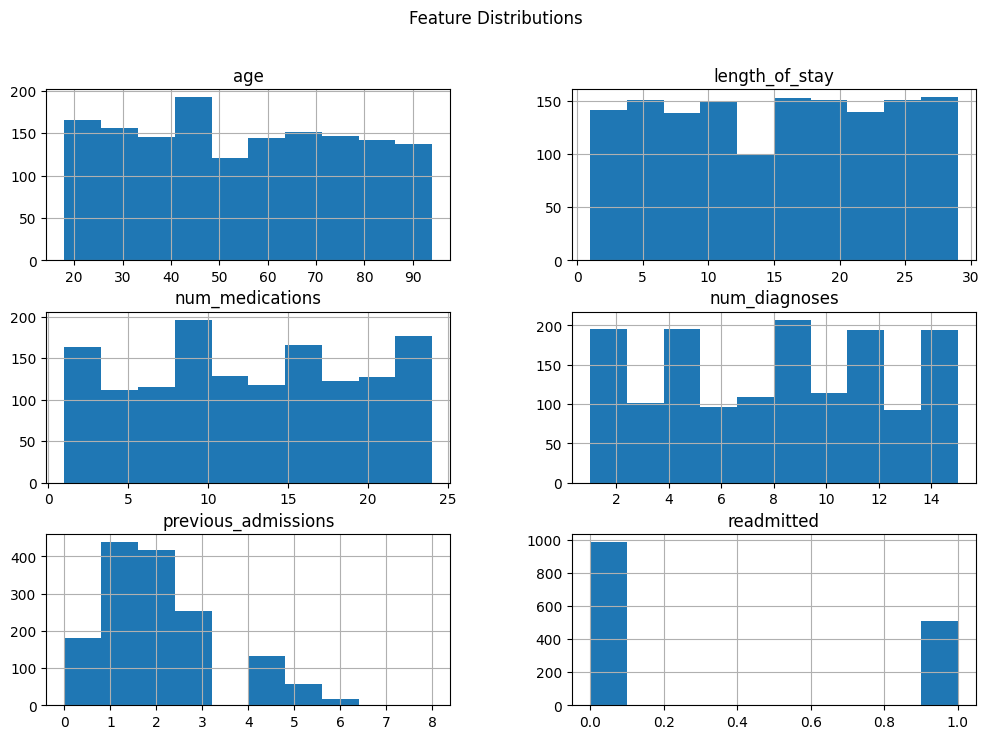

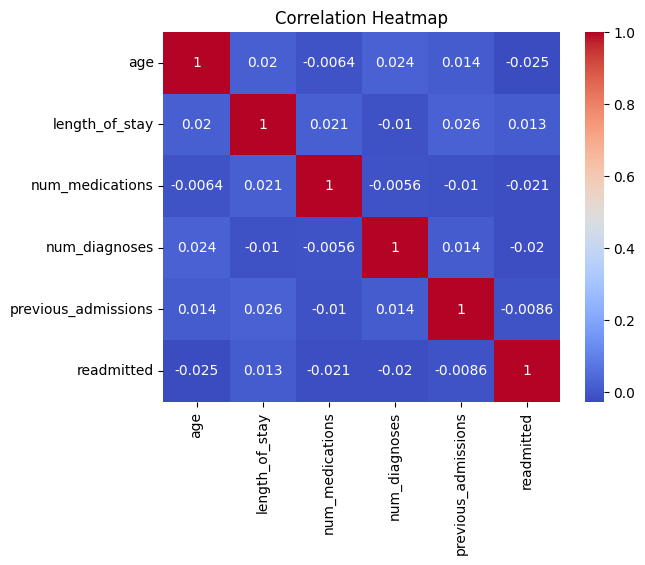

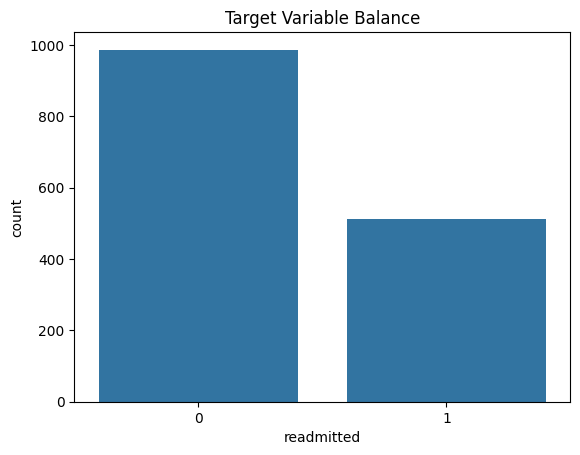

In [ ]:
# CODE_CELL13
import seaborn as sns
import matplotlib.pyplot as plt

def explore_dataset(df, step="summary"):
    """Helper for exploratory data analysis with multiple options."""
    if step == "summary":
        print("=== Dataset Summary ===")
        print(df.describe(include="all"))
    elif step == "distributions":
        df.hist(figsize=(12, 8))
        plt.suptitle("Feature Distributions")
        plt.show()
    elif step == "correlations":
        corr = df.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap="coolwarm")
        plt.title("Correlation Heatmap")
        plt.show()
    elif step == "target_balance":
        sns.countplot(x="readmitted", data=df)
        plt.title("Target Variable Balance")
        plt.show()
    else:
        print("Step not recognised. Options: 'summary', 'distributions', 'correlations', 'target_balance'")
explore_dataset(df, step="summary")
explore_dataset(df, step="distributions")
explore_dataset(df, step="correlations")    
explore_dataset(df, step="target_balance")

In [ ]:
def handle_missing_values(df, strategy="mean", column=None):
    """
    Handle missing values with different strategies:
    - 'mean' / 'median' / 'mode' for imputation
    - 'drop' to remove missing rows
    """
    if column is None:
        print("Please specify a column.")
        return df
    
    if strategy == "mean":
        df[column].fillna(df[column].mean(), inplace=True)
    elif strategy == "median":
        df[column].fillna(df[column].median(), inplace=True)
    elif strategy == "mode":
        df[column].fillna(df[column].mode()[0], inplace=True)
    elif strategy == "drop":
        df.dropna(subset=[column], inplace=True)
    else:
        print("Unknown strategy. Options: 'mean', 'median', 'mode', 'drop'")
    
    return df

handle_missing_values(df, strategy="mean", column="num_medications")
handle_missing_values(df, strategy="mean", column="length_of_stay")
handle_missing_values(df, strategy="mode", column="readmitted")
handle_missing_values(df, strategy="mode", column="age")


C:\Users\user\AppData\Local\Temp\ipykernel_16928\2766346207.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_16928\2766346207.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

,age,length_of_stay,num_medications,num_diagnoses,admission_type,discharge_disposition,previous_admissions,diabetic,readmitted
0,84,16.000000,20.0,8,Emergency,Transfer,2,Yes,0
1,35,27.000000,15.0,3,Urgent,Home,3,Yes,0
2,75,23.000000,9.0,8,Emergency,Transfer,2,Yes,0
3,65,6.000000,10.0,3,Urgent,Home,1,No,0
4,91,7.000000,19.0,3,Urgent,Home,1,No,0
...,...,...,...,...,...,...,...,...,...
1495,20,1.000000,24.0,12,Elective,Home,1,No,1
1496,37,22.000000,17.0,2,Elective,Home,3,Yes,0
1497,45,20.000000,19.0,13,Urgent,Home,2,Yes,0
1498,54,26.000000,14.0,9,Emergency,Home,3,Yes,0


In [ ]:
# CODE_CELL15
def detect_outliers_iqr(df, column):
    """Detect outliers in a numerical column using IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[column] < (Q1 - 1.5*IQR)) | (df[column] > (Q3 + 1.5*IQR))]
    print(f"Found {len(outliers)} outliers in {column}")
    return outliers

detect_outliers_iqr(df, "num_medications")
detect_outliers_iqr(df, "length_of_stay")
detect_outliers_iqr(df, "age")
detect_outliers_iqr(df, "previous_admissions")

def treat_outliers(df, column, method="cap"):
    """
    Treat outliers in a numerical column.
    - 'cap' : Cap values at 5th and 95th percentiles
    - 'remove' : Remove rows with outliers
    """
    if method == "cap":
        lower = df[column].quantile(0.05)
        upper = df[column].quantile(0.95)
        df[column] = np.where(df[column] < lower, lower, df[column])
        df[column] = np.where(df[column] > upper, upper, df[column])
    elif method == "remove":
        outliers = detect_outliers_iqr(df, column)
        df = df.drop(outliers.index)
    else:
        print("Unknown method. Options: 'cap', 'remove'")
    return df
treat_outliers(df, "num_medications",  method="cap")
treat_outliers(df, "length_of_stay", method="cap")
treat_outliers(df, "age", method="cap")
treat_outliers(df, "previous_admissions", method="cap")
treat_outliers(df, "previous_admissions", method="remove") 

Found 0 outliers in num_medications
Found 0 outliers in length_of_stay
Found 0 outliers in age
Found 0 outliers in previous_admissions
Found 0 outliers in previous_admissions


,age,length_of_stay,num_medications,num_diagnoses,admission_type,discharge_disposition,previous_admissions,diabetic,readmitted
0,84.0,16.000000,20.0,8,Emergency,Transfer,2.0,Yes,0
1,35.0,27.000000,15.0,3,Urgent,Home,3.0,Yes,0
2,75.0,23.000000,9.0,8,Emergency,Transfer,2.0,Yes,0
3,65.0,6.000000,10.0,3,Urgent,Home,1.0,No,0
4,89.0,7.000000,19.0,3,Urgent,Home,1.0,No,0
...,...,...,...,...,...,...,...,...,...
1495,21.0,2.000000,23.0,12,Elective,Home,1.0,No,1
1496,37.0,22.000000,17.0,2,Elective,Home,3.0,Yes,0
1497,45.0,20.000000,19.0,13,Urgent,Home,2.0,Yes,0
1498,54.0,26.000000,14.0,9,Emergency,Home,3.0,Yes,0


In [ ]:
# CODE_CELL16

def document_data_issues(df):
    """Check dataset for quality issues and print findings."""
    issues = {}
    
    # Missing values
    missing = df.isnull().sum()
    issues["missing_values"] = missing[missing > 0].to_dict()
    
    # Duplicates
    issues["duplicates"] = df.duplicated().sum()
    
    # Data types
    issues["data_types"] = df.dtypes.to_dict()
    
    print("=== Data Quality Report ===")
    for k, v in issues.items():
        print(f"{k}: {v}")
    return issues

document_data_issues(df)

=== Data Quality Report ===
missing_values: {}
duplicates: 0
data_types: {'age': dtype('float64'), 'length_of_stay': dtype('float64'), 'num_medications': dtype('float64'), 'num_diagnoses': dtype('int64'), 'admission_type': dtype('O'), 'discharge_disposition': dtype('O'), 'previous_admissions': dtype('float64'), 'diabetic': dtype('O'), 'readmitted': dtype('int64')}


{'missing_values': {},
 'duplicates': np.int64(0),
 'data_types': {'age': dtype('float64'),
  'length_of_stay': dtype('float64'),
  'num_medications': dtype('float64'),
  'num_diagnoses': dtype('int64'),
  'admission_type': dtype('O'),
  'discharge_disposition': dtype('O'),
  'previous_admissions': dtype('float64'),
  'diabetic': dtype('O'),
  'readmitted': dtype('int64')}}

MARKDOWN_CELL10

```
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# ---------- Model Training ----------
def train_model(X, y, model="logistic"):
    """
    Train a model based on choice:
    - 'logistic' : Logistic Regression
    - 'random_forest' : Random Forest
    - 'svm' : Support Vector Machine
    """
    if model == "logistic":
        clf = LogisticRegression(max_iter=500)
    elif model == "random_forest":
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model == "svm":
        clf = SVC(probability=True, random_state=42)
    else:
        print("Unknown model. Options: 'logistic', 'random_forest', 'svm'")
        return None
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None
    
    return clf, X_test, y_test, y_pred, y_proba

# ---------- Model Evaluation ----------
def evaluate_model(y_true, y_pred, y_proba=None):
    """Evaluate model using precision, recall, F1-score, and ROC-AUC."""
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred))
    
    if y_proba is not None:
        auc = roc_auc_score(y_true, y_proba)
        print(f"ROC-AUC Score: {auc:.3f}")
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()

# ---------- Model Comparison ----------
def compare_models(X, y, models=["logistic", "random_forest", "svm"]):
    """Train multiple models and compare performance."""
    results = {}
    for m in models:
        print(f"\nTraining {m}...")
        clf, X_test, y_test, y_pred, y_proba = train_model(X, y, model=m)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
        results[m] = {
            "precision": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["precision"],
            "recall": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["recall"],
            "f1": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"],
            "roc_auc": auc
        }
    return pd.DataFrame(results).T

# ---------- Cross-Validation ----------
def cross_validate_model(X, y, model="logistic", folds=5):
    """Perform k-fold cross-validation and report average accuracy."""
    if model == "logistic":
        clf = LogisticRegression(max_iter=500)
    elif model == "random_forest":
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model == "svm":
        clf = SVC(probability=True, random_state=42)
    else:
        print("Unknown model. Options: 'logistic', 'random_forest', 'svm'")
        return None
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X, y, cv=skf, scoring="accuracy")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")
    return scores

```


In [ ]:
# CODE_CELL17
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_features = ['admission_type', 'discharge_disposition', 'diabetic']
numeric_features = ['age', 'length_of_stay', 'num_medications', 'num_diagnoses', 'previous_admissions']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])    
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

processed_data = preprocessor.fit_transform(df)
feature_names = preprocessor.get_feature_names_out()
print(processed_data)
print(feature_names)


# ---------- Model Training ----------
def train_model(X, y, model="logistic"):
    """
    Train a model based on choice:
    - 'logistic' : Logistic Regression
    - 'random_forest' : Random Forest
    - 'svm' : Support Vector Machine
    """
    if model == "logistic":
        clf = LogisticRegression(max_iter=500)
    elif model == "random_forest":
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model == "svm":
        clf = SVC(probability=True, random_state=42)
    else:
        print("Unknown model. Options: 'logistic', 'random_forest', 'svm'")
        return None
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_proba = clf.predict_proba(X_test)[:,1] if hasattr(clf, "predict_proba") else None
    
    return clf, X_test, y_test, y_pred, y_proba

y = df['readmitted']
X = processed_data

[[ 1.35263981e+00  1.08301616e-01  1.12761019e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-9.10999214e-01  1.47929119e+00  3.61424550e-01 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 9.36869375e-01  9.80749526e-01 -5.57998212e-01 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 ...
 [-4.49032067e-01  6.06843279e-01  9.74373059e-01 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-3.32616346e-02  1.35465577e+00  2.08187423e-01 ...  0.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [-1.51155651e+00 -4.15451385e-04  1.43408444e+00 ...  0.00000000e+00
   1.00000000e+00  0.00000000e+00]]
['num__age' 'num__length_of_stay' 'num__num_medications'
 'num__num_diagnoses' 'num__previous_admissions'
 'cat__admission_type_Elective' 'cat__admission_type_Emergency'
 'cat__admission_type_Urgent' 'cat__discharge_disposition_AMA'
 'cat__discharge_disposition_Home' 'cat__discharge_disposition_Transfer'
 'cat__diabetic_No' 'cat__diabetic_Yes']


In [ ]:
# CODE_CELL18
def evaluate_model(y_true, y_pred, y_proba=None):
    """Evaluate model using precision, recall, F1-score, and ROC-AUC."""
    print("=== Classification Report ===")
    print(classification_report(y_true, y_pred))
    
    if y_proba is not None:
        auc = roc_auc_score(y_true, y_proba)
        print(f"ROC-AUC Score: {auc:.3f}")
        fpr, tpr, _ = roc_curve(y_true, y_proba)
        plt.plot(fpr, tpr, label=f"AUC={auc:.2f}")
        plt.plot([0,1],[0,1],'--',color='gray')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve")
        plt.legend()
        plt.show()
clf, X_test, y_test, y_pred, y_proba = train_model(X, y, model="random_forest")
clf, X_test, y_test, y_pred, y_proba = train_model(X, y, model="logistic")
clf, X_test, y_test, y_pred, y_proba = train_model(X, y, model="svm")


# ---------- Model Comparison ----------
def compare_models(X, y, models=["logistic", "random_forest", "svm"]):
    """Train multiple models and compare performance."""
    results = {}
    for m in models:
        print(f"\nTraining {m}...")
        clf, X_test, y_test, y_pred, y_proba = train_model(X, y, model=m)
        auc = roc_auc_score(y_test, y_proba) if y_proba is not None else np.nan
        results[m] = {
            "precision": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["precision"],
            "recall": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["recall"],
            "f1": classification_report(y_test, y_pred, output_dict=True)["weighted avg"]["f1-score"],
            "roc_auc": auc
        }
    return pd.DataFrame(results).T

compare_models(X, y)




Training logistic...

Training random_forest...

Training svm...


d:\softwares\anaconda\envs\intelligent_systems_exam\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\softwares\anaconda\envs\intelligent_systems_exam\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\softwares\anaconda\envs\intelligent_systems_exam\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

,precision,recall,f1,roc_auc
logistic,0.432672,0.657778,0.521990,0.463408
random_forest,0.531208,0.615556,0.542653,0.440407
svm,0.432672,0.657778,0.521990,0.547604


In [ ]:
# CODE_CELL19
# ---------- Cross-Validation ----------
def cross_validate_model(X, y, model="logistic", folds=5):
    """Perform k-fold cross-validation and report average accuracy."""
    if model == "logistic":
        clf = LogisticRegression(max_iter=500)
    elif model == "random_forest":
        clf = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model == "svm":
        clf = SVC(probability=True, random_state=42)
    else:
        print("Unknown model. Options: 'logistic', 'random_forest', 'svm'")
        return None
    
    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    scores = cross_val_score(clf, X, y, cv=skf, scoring="accuracy")
    print(f"Cross-validation scores: {scores}")
    print(f"Mean accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})")
    return scores


print("Random Forest CV Accuracy:")
cross_validate_model(X, y, model="random_forest", folds=5)
print("Logistic Regression CV Accuracy:")   
cross_validate_model(X, y, model="logistic", folds=5)
print("SVM CV Accuracy:")
cross_validate_model(X, y, model="svm", folds=5)

Random Forest CV Accuracy:
Cross-validation scores: [0.60666667 0.57333333 0.63333333 0.62       0.62333333]
Mean accuracy: 0.611 (+/- 0.021)
Logistic Regression CV Accuracy:
Cross-validation scores: [0.66       0.66       0.65666667 0.65666667 0.65666667]
Mean accuracy: 0.658 (+/- 0.002)
SVM CV Accuracy:
Cross-validation scores: [0.65333333 0.66       0.65666667 0.65666667 0.65666667]
Mean accuracy: 0.657 (+/- 0.002)


array([0.65333333, 0.66      , 0.65666667, 0.65666667, 0.65666667])

MARKDOWN_CELL11

```
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ---------- Inspect Model Features ----------
def inspect_model_features(model, feature_names):
    """
    Inspect model features:
    - For Logistic Regression: show coefficients
    - For Random Forest: show feature importances
    - For SVM: not directly interpretable (warn the student)
    """
    if hasattr(model, "coef_"):
        coefs = pd.Series(model.coef_[0], index=feature_names).sort_values(key=abs, ascending=False)
        print("Top coefficients (Logistic Regression):")
        print(coefs.head(10))
        coefs.head(10).plot(kind="barh", title="Top Logistic Coefficients")
        plt.show()
    elif hasattr(model, "feature_importances_"):
        imps = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
        print("Top feature importances (Random Forest):")
        print(imps.head(10))
        imps.head(10).plot(kind="barh", title="Top Random Forest Features")
        plt.show()
    else:
        print("This model does not provide direct feature importance (e.g., SVM with kernel).")

# ---------- Error Analysis ----------
def error_analysis(y_true, y_pred, X_test=None):
    """
    Inspect misclassified cases for deeper evaluation.
    """
    errors = np.where(y_true != y_pred)[0]
    print(f"Number of misclassified cases: {len(errors)}")
    if X_test is not None:
        print("Example misclassified rows:")
        display(pd.DataFrame(X_test).iloc[errors[:5]])  # show first 5 errors

# ---------- Risk & Bias Check Stub ----------
def check_risk_bias(df, sensitive_column, predictions):
    """
    Simple bias check: compare prediction rates across groups.
    Useful for healthcare fairness evaluation.
    """
    df_copy = df.copy()
    df_copy["prediction"] = predictions
    rates = df_copy.groupby(sensitive_column)["prediction"].mean()
    print(f"Prediction rates by {sensitive_column}:")
    print(rates)
    return rates
```

In [ ]:
# CODE_CELL20

MARKDOWN_CELL12


MARKDOWN_CELL13

```
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# Helper function with intentional bugs - DEBUG THIS
def create_disease_prediction_model(input_shape, num_classes):
    """
    Creates a neural network for disease progression prediction
    BUG ALERT: This function contains 3-4 deliberate errors that affect model performance
    """
    model = keras.Sequential([
        keras.layers.Dense(128, activation='sigmoid', input_shape=(input_shape,)),  # Bug 1: Wrong activation for hidden layer
        keras.layers.Dropout(0.8),  # Bug 2: Dropout rate too high
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(num_classes, activation='relu')  # Bug 3: Wrong activation for multi-class output
    ])
    
    # Bug 4: Wrong optimizer and loss function for the task
    model.compile(optimizer='sgd',
                  loss='mean_squared_error',
                  metrics=['accuracy'])
    return model

# Sample medical data (features: age, BMI, blood_pressure, cholesterol, etc.)
np.random.seed(42)
X_train = np.random.randn(1000, 8)  # 8 medical features
y_train = np.random.randint(0, 3, 1000)  # 3 disease progression stages
X_test = np.random.randn(200, 8)
y_test = np.random.randint(0, 3, 200)
```

MARKDOWN_CELL14
1. Bug: Sigmoid Activation in First Hidden Layerkeras.layers.Dense(128, activation='sigmoid', ...)Explanation:

Using the 'sigmoid' activation function in hidden layers is a significant problem, especially in deeper networks.Vanishing Gradients: The sigmoid function squashes its input values into the range (0, 1). The derivative (slope) of this function is very small for inputs that are far from zero (either large positive or large negative). During backpropagation, these small derivatives are multiplied together across layers. This causes the gradient signal to shrink exponentially, becoming extremely small by the time it reaches the early layers.Impact: This "vanishing gradient" problem makes it very difficult for the network's early layers to learn, slowing down or completely stalling the training process.Correction: The standard and much more effective activation for hidden layers is 'relu' (Rectified Linear Unit), which does not suffer from this issue for positive values (its derivative is 1).

2. Bug: Excessive Dropout Ratekeras.layers.Dropout(0.8)Explanation:

Dropout is a regularization technique to prevent overfitting by randomly "dropping" (setting to zero) a fraction of neurons during training. However, a rate of 0.8 is far too high.Information Loss: This setting means that 80% of the neurons' outputs from the previous layer are discarded at every training step. This excessive loss of information prevents the network from learning the underlying patterns in the data.Impact: Instead of preventing overfitting, this high rate will almost certainly cause underfitting. The model will be unable to achieve good performance even on the training data because it is too heavily constrained.Correction: A typical dropout rate is usually in the range of 0.2 to 0.5 (20% to 50%).

3. Bug: ReLU Activation in Output Layerkeras.layers.Dense(num_classes, activation='relu')Explanation:

The problem is a multi-class classification task (predicting one of 3 disease stages). The final layer's activation function must produce an output that represents a probability distribution across these classes.

Incorrect Output: The 'relu' activation function ($max(0, x)$) outputs values from 0 to infinity. This output cannot be interpreted as a probability.

Impact: The model's output is incompatible with the task. It doesn't show the likelihood of the input belonging to each of the three disease stages.

Correction: The correct activation for a multi-class classification problem is 'softmax'. Softmax converts the raw outputs (logits) into a vector of probabilities, where each value is between 0 and 1, and the sum of all values is 1.

4. Bug: Incorrect Loss Functionmodel.compile(..., loss='mean_squared_error', ...)Explanation:
This bug is directly related to Bug 3. The loss function measures how "wrong" the model's predictions are, and it must match the task and the output activation.Wrong Task: 'mean_squared_error' (MSE) is a loss function for regression problems, where the goal is to predict a continuous value (e.g., a patient's temperature or blood pressure value). It calculates the average squared difference between the predicted and actual continuous numbers.Impact: This problem is classification (choosing a category: 0, 1, or 2). Using MSE here is mathematically incorrect. It treats the class labels (0, 1, 2) as numerical quantities, implying that being "wrong" by predicting 2 instead of 0 is four times worse than predicting 1 instead of 0 ($(2-0)^2$ vs $(1-0)^2$). This makes no logical sense for categories.Correction: The correct loss function for multi-class classification with integer labels (like 0, 1, 2) is 'sparse_categorical_crossentropy'. This function is designed to measure the difference between the predicted probability distribution (from the 'softmax' output) and the actual class label.

In [ ]:
# CODE_CELL21
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# Helper function with bugs FIXED
def create_disease_prediction_model(input_shape, num_classes):
    """
    Creates a (CORRECTED) neural network for disease progression prediction
    """
    model = keras.Sequential([
        # Bug 1 Fixed: Changed 'sigmoid' to 'relu' for the hidden layer
        keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        
        # Bug 2 Fixed: Reduced dropout rate from 0.8 to a sensible 0.3
        keras.layers.Dropout(0.3), 
        
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        
        # Bug 3 Fixed: Changed 'relu' to 'softmax' for multi-class classification output
        keras.layers.Dense(num_classes, activation='softmax') 
    ])
    
    # Bug 4 Fixed: 
    # 1. Changed loss to 'sparse_categorical_crossentropy' for multi-class classification
    # 2. Changed optimizer to 'adam' for better/faster convergence than 'sgd'
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Sample medical data (features: age, BMI, blood_pressure, cholesterol, etc.)
np.random.seed(42)
X_train = np.random.randn(1000, 8)  # 8 medical features
y_train = np.random.randint(0, 3, 1000) # 3 disease progression stages
X_test = np.random.randn(200, 8)
y_test = np.random.randint(0, 3, 200)

# --- Create and Train the Corrected Model ---

# Define model parameters from the data
input_shape = X_train.shape[1] # This is 8
num_classes = len(np.unique(y_train)) # This is 3

# Create the model
model = create_disease_prediction_model(input_shape, num_classes)

# Print model summary to verify the architecture
print("Model Summary:")
model.summary()

# Train the model
print("\nStarting model training...")
history = model.fit(
    X_train, 
    y_train, 
    epochs=15,  # Increased epochs slightly for better training
    validation_data=(X_test, y_test),
    verbose=2
)

# Evaluate the model
print("\nEvaluating model on test data:")
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc*100:.2f}%")

Model Summary:


d:\softwares\anaconda\envs\intelligent_systems_exam\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,587 (45.26 KB)

 Trainable params: 11,587 (45.26 KB)

 Non-trainable params: 0 (0.00 B)


Starting model training...
Epoch 1/15
32/32 - 1s - 33ms/step - accuracy: 0.3310 - loss: 1.1105 - val_accuracy: 0.3550 - val_loss: 1.1017
Epoch 2/15
32/32 - 0s - 4ms/step - accuracy: 0.3510 - loss: 1.0968 - val_accuracy: 0.3150 - val_loss: 1.1034
Epoch 3/15
32/32 - 0s - 3ms/step - accuracy: 0.4020 - loss: 1.0849 - val_accuracy: 0.3700 - val_loss: 1.1013
Epoch 4/15
32/32 - 0s - 3ms/step - accuracy: 0.3770 - loss: 1.0872 - val_accuracy: 0.3500 - val_loss: 1.1039
Epoch 5/15
32/32 - 0s - 4ms/step - accuracy: 0.3760 - loss: 1.0858 - val_accuracy: 0.3250 - val_loss: 1.1065
Epoch 6/15
32/32 - 0s - 3ms/step - accuracy: 0.4040 - loss: 1.0766 - val_accuracy: 0.3300 - val_loss: 1.1114
Epoch 7/15
32/32 - 0s - 3ms/step - accuracy: 0.4190 - loss: 1.0798 - val_accuracy: 0.3400 - val_loss: 1.1062
Epoch 8/15
32/32 - 0s - 4ms/step - accuracy: 0.4230 - loss: 1.0673 - val_accuracy: 0.3450 - val_loss: 1.1095
Epoch 9/15
32/32 - 0s - 3ms/step - accuracy: 0.4220 - loss: 1.0670 - val_accuracy: 0.3550 - val_los

MARKDOWN_CELL15

Here is the simple English explanation of the code and the bugs that were fixed.

What Does This Code Do?
This Python code uses the TensorFlow library to build, train, and test a "neural network," which is a type of Artificial Intelligence (AI) model.

The goal of this specific AI is to predict a disease's progression stage (e.g., Stage 0, Stage 1, or Stage 2). It tries to guess the correct stage by looking at 8 different medical features for a patient (like age, BMI, blood pressure, etc.).

The code works in these steps:

Define the AI "Brain" (create_disease_prediction_model): This function is the blueprint that builds the structure of the neural network.

Create Fake Data: Since we don't have real patient data, the code creates random numbers (X_train, y_train) to "train" the AI and more random data (X_test, y_test) to "test" it.

Train the AI (model.fit): The model studies the training data and its correct answers (y_train) to learn how to find patterns.

Test the AI (model.evaluate): After training, the model is tested on data it has never seen before (X_test) to see how "accurate" its predictions are.

The 4 Bugs That Were Fixed
The original code had 4 major bugs that prevented the AI from learning correctly. Here is what they were and how we fixed them.

1. Bug: 'sigmoid' Activation in the First Layer

The Problem: The first layer used activation='sigmoid'. This function causes a problem called the "vanishing gradient," which means the AI stops learning very quickly during training.

The Fix: We changed it to activation='relu'. 'ReLU' is the modern standard for hidden layers. It helps the AI learn much faster and more effectively.

2. Bug: Dropout Rate Too High

The Problem: The code had Dropout(0.8). This told the model to randomly "forget" 80% of what it learned in that layer during every step of training. This rate is far too high; it's like trying to study for an exam while forgetting 80% of every page you read. The model couldn't learn anything.

The Fix: We lowered the rate to Dropout(0.3) (30%). This is a much more sensible rate that helps the model generalize without forgetting everything it learns.

3. Bug: 'relu' Activation in the Final Layer

The Problem: The final layer (the "output") used activation='relu'. The 'relu' function outputs any number from 0 to infinity. This is not useful when we need to choose one of 3 classes.

The Fix: We changed it to activation='softmax'. 'Softmax' is perfect for this job. It converts the model's final numbers into probabilities that all add up to 100%. (e.g., "70% chance this is Stage 1, 20% Stage 2, 10% Stage 0").

4. Bug: Wrong Loss Function

The Problem: The model was compiled with loss='mean_squared_error'. This loss function is used for regression problems (like predicting a house price, e.g., $150,500.75). Our problem is classification (choosing a category: 0, 1, or 2). This was the wrong mathematical tool for the job.

The Fix: We changed it to loss='sparse_categorical_crossentropy'. This is the correct loss function to use for a classification problem where the answers are simple numbers (0, 1, 2). It correctly measures how "wrong" the model's probability predictions are.

MARKDOWN_CELL16
```
def analyse_model_predictions(model, X_test, y_test):
    """
    Analyses model predictions and provides interpretation tools
    You need to complete this function
    """
    predictions = model.predict(X_test)
    
    # Your task: Complete this function to return:
    # - Prediction probabilities
    # - Confidence scores
    # - Feature importance analysis (if possible)
    
    return {
        'predictions': None,  # Complete this
        'confidence_scores': None,  # Complete this
        'analysis_summary': None  # Complete this
    }
```    

In [4]:
# CODE_CELL22
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

# --- Re-defining the corrected model from the previous step ---
def create_disease_prediction_model(input_shape, num_classes):
    """
    Creates a (CORRECTED) neural network for disease progression prediction
    """
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu', input_shape=(input_shape,)),
        keras.layers.Dropout(0.3), 
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(num_classes, activation='softmax') 
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Setup: Create and train a sample model to analyse ---
np.random.seed(42)
X_train = np.random.randn(1000, 8)
y_train = np.random.randint(0, 3, 1000)
X_test = np.random.randn(200, 8)
y_test = np.random.randint(0, 3, 200)

input_shape = X_train.shape[1]
num_classes = len(np.unique(y_train))

# Create and train the model (silently, verbose=0)
model = create_disease_prediction_model(input_shape, num_classes)
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), verbose=0)
print("Model trained successfully. Running analysis...")


# --- Completed Function ---

def analyse_model_predictions(model, X_test, y_test):
    """
    Analyses model predictions and provides interpretation tools
    """
    
    # --- 1. Get Predictions & Confidence ---
    
    # Get the raw probabilities for each class (e.g., [0.1, 0.8, 0.1])
    predictions_proba = model.predict(X_test)
    
    # Get the 'confidence score' (the highest probability) for each prediction
    # e.g., for [0.1, 0.8, 0.1], the confidence is 0.8
    confidence_scores = np.max(predictions_proba, axis=1)
    
    # Get the final predicted class (the index of the highest probability)
    # e.g., for [0.1, 0.8, 0.1], the prediction is 1
    predicted_classes = np.argmax(predictions_proba, axis=1)
    
    
    # --- 2. Generate Analysis Summary ---
    
    # a. Overall performance
    baseline_loss, baseline_acc = model.evaluate(X_test, y_test, verbose=0)
    
    # b. Confidence analysis
    avg_confidence = np.mean(confidence_scores)
    
    # Separate confidence for correct vs. incorrect predictions
    correct_indices = (predicted_classes == y_test)
    incorrect_indices = (predicted_classes != y_test)
    
    avg_confidence_correct = np.mean(confidence_scores[correct_indices])
    avg_confidence_incorrect = 0.0 # Default if no incorrect predictions
    if np.any(incorrect_indices):
        avg_confidence_incorrect = np.mean(confidence_scores[incorrect_indices])

    # c. Confusion Matrix
    confusion_matrix = tf.math.confusion_matrix(
        labels=y_test, 
        predictions=predicted_classes
    ).numpy()
    
    
    # --- 3. Feature Importance (Permutation Importance) ---
    
    num_features = X_test.shape[1]
    feature_importance_scores = []
    
    print("\nCalculating feature importance (this may take a moment)...")
    for i in range(num_features):
        # Create a copy
        X_test_permuted = X_test.copy()
        
        # Shuffle *only* the i-th feature
        np.random.shuffle(X_test_permuted[:, i])
        
        # Evaluate the model on the permuted data
        permuted_loss, permuted_acc = model.evaluate(X_test_permuted, y_test, verbose=0)
        
        # The importance is the drop in accuracy
        importance = baseline_acc - permuted_acc
        feature_importance_scores.append(importance)
        
    # Format importance scores
    importance_ranking = np.argsort(feature_importance_scores)[::-1] # Descending order
    importance_summary = "\nFeature Importance (Permutation Method):\n"
    for i in importance_ranking:
        importance_summary += f"  - Feature {i}: {feature_importance_scores[i]:.4f} (Accuracy drop)\n"

    
    # --- 4. Compile the Final Summary String ---
    
    summary = (
        f"\n--- Model Performance Analysis ---\n"
        f"Overall Test Accuracy: {baseline_acc * 100:.2f}%\n"
        f"Overall Test Loss: {baseline_loss:.4f}\n\n"
        
        f"--- Prediction Confidence ---\n"
        f"Average Confidence (All Predictions): {avg_confidence:.4f}\n"
        f"Average Confidence (Correct): {avg_confidence_correct:.4f}\n"
        f"Average Confidence (Incorrect): {avg_confidence_incorrect:.4f}\n\n"
        
        f"--- Confusion Matrix ---\n"
        f"(Rows = True Label, Columns = Predicted Label)\n"
        f"{confusion_matrix}\n"
        
        f"{importance_summary}"
    )

    return {
        'predictions': predicted_classes,
        'confidence_scores': confidence_scores,
        'analysis_summary': summary
    }

# --- Execute the function and print the results ---
analysis_results = analyse_model_predictions(model, X_test, y_test)

print(analysis_results['analysis_summary'])

Model trained successfully. Running analysis...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

Calculating feature importance (this may take a moment)...

--- Model Performance Analysis ---
Overall Test Accuracy: 34.50%
Overall Test Loss: 1.1361

--- Prediction Confidence ---
Average Confidence (All Predictions): 0.4214
Average Confidence (Correct): 0.4254
Average Confidence (Incorrect): 0.4192

--- Confusion Matrix ---
(Rows = True Label, Columns = Predicted Label)
[[24 25 14]
 [23 24 28]
 [20 21 21]]

Feature Importance (Permutation Method):
  - Feature 4: 0.0500 (Accuracy drop)
  - Feature 1: 0.0450 (Accuracy drop)
  - Feature 7: 0.0350 (Accuracy drop)
  - Feature 2: 0.0250 (Accuracy drop)
  - Feature 0: 0.0250 (Accuracy drop)
  - Feature 5: 0.0150 (Accuracy drop)
  - Feature 6: 0.0000 (Accuracy drop)
  - Feature 3: -0.0050 (Accuracy drop)



MARKDOWN_CELL17

MARKDOWN_CELL18

MARKDOWN_CELL19

MARKDOWN_CELL20

MARKDOWN_CELL21

In [2]:
!jupyter nbconvert --to html  intelligent_systems_examination_notebook.ipynb

[NbConvertApp] Converting notebook intelligent_systems_examination_notebook.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 5 image(s).
[NbConvertApp] Writing 661666 bytes to intelligent_systems_examination_notebook.html


In [5]:
!jupyter nbconvert --to pdf intelligent_systems_examination_notebook.ipynb

[NbConvertApp] Converting notebook intelligent_systems_examination_notebook.ipynb to pdf
[NbConvertApp] ERROR | Error while converting 'intelligent_systems_examination_notebook.ipynb'
Traceback (most recent call last):
  File "D:\softwares\anaconda\Lib\site-packages\nbconvert\nbconvertapp.py", line 487, in export_single_notebook
    output, resources = self.exporter.from_filename(
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\softwares\anaconda\Lib\site-packages\nbconvert\exporters\templateexporter.py", line 386, in from_filename
    return super().from_filename(filename, resources, **kw)  # type:ignore[return-value]
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\softwares\anaconda\Lib\site-packages\nbconvert\exporters\exporter.py", line 201, in from_filename
    return self.from_file(f, resources=resources, **kw)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\softwares\anaconda\Lib\site-packages\nbconvert\exporters\template